# **Project Title: Text Analysis and Classification Using NLP Techniques**

Dataset Description:
The dataset contains 74,681 user-generated posts from Twitter, with four columns:

1-Index: Sample ID (not important).

2-Borderlands: Represents a number of areas related to each sample.

3-Mode: The expressed sentiment or feeling of the user about the shared text.

4-Text: The actual tweet or text shared by the user.

# **Note: Column names in the original dataset were incorrect and have been renamed appropriately.**

# Project Goals:

1-Import necessary libraries.

2-Perform a quick scan of the dataset.

3-Conduct Exploratory Data Analysis (EDA).

4-Clean the text data.

5-Introduce and implement several Natural Language Processing (NLP) techniques:

6-CountVectorizer

7-TF-IDF (Term Frequency-Inverse Document Frequency)

8-N-Grams

9-Part of Speech (POS) Tagging

10-Named Entity Recognition (NER)

11-Stopwords Removal

12-Lemmatization and Stemming

13-Tokenization

14-Identify most common words and punctuation marks

15-Visualize text with WordClouds

16-Prepare the dataset using PyTorch and Keras.

17-Build and train a Bi-directional LSTM model to classify the text based on sentiment.




<p style="background-color:#45B39D; color:white; padding:10px;">
  <b style="font-size: 16px;">📌 Importing Libraries</b>
</p>

In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import random
import spacy
import nltk
from nltk.tokenize import RegexpTokenizer,TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from nltk.corpus import stopwords
from collections import defaultdict
from nltk.stem import WordNetLemmatizer, PorterStemmer
from wordcloud import WordCloud
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import torch.optim as optim




**Description**
* First we load the dataset and show 7 random samples of it

In [3]:
df=pd.read_csv('/content/twitter_training.csv')
df.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
7944,9365,Overwatch,Negative,"Already lost, games shit"
12511,8550,NBA2K,Positive,"I won't lie, I follow the LOT NBA 2K content c..."
49562,6108,FIFA,Irrelevant,This pad no...
40031,1272,Battlefield,Negative,Battlefield V flopped so bad it’s not even funny
5243,104,Amazon,Negative,Hey @amazon I understand with everything going...


# **  then,take the overview of dataset :**

# the number of rows in the dataset is   :68431.

# the number of columns in the dataset is :4

In [4]:
print(f'the dataset shape is {df.shape}')

the dataset shape is (53826, 4)


# the name of the columns is not suitable,try to change it.

In [5]:
print(f'the name of the columns are \n{df.columns}')

the name of the columns are 
Index(['2401', 'Borderlands', 'Positive',
       'im getting on borderlands and i will murder you all ,'],
      dtype='object')


# view the dataypes of columns:

In [6]:
print(f'the columns datatypes is \n{df.dtypes}')

the columns datatypes is 
2401                                                      int64
Borderlands                                              object
Positive                                                 object
im getting on borderlands and i will murder you all ,    object
dtype: object


# "Display the statistical summary of the dataset and capture a snapshot of it."

In [7]:
df.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,53826.000000,53826,53826,53334
unique,NaN,24,4,49997
top,NaN,Microsoft,Positive,"At the same time, despite the fact that there ..."
freq,NaN,2400,16079,120
mean,6289.110950,NaN,NaN,NaN
std,3939.111938,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,2664.000000,NaN,NaN,NaN
50%,6190.000000,NaN,NaN,NaN
75%,9685.000000,NaN,NaN,NaN



<p style="background-color:#45B39D; color:white; padding:10px;">
  <b style="font-size: 16px;">📊 EDA</b>
</p>

In [8]:
def show_details(dataset):
  missed_values=df.isnull().sum()
  missed_values_percentage=(missed_values/len(df))*100

  duplicated_values=df.duplicated().sum()
  duplicated_values_percentage=(duplicated_values/len(df))*100

  uique_values=df.nunique()

  details=pd.DataFrame({
      'missed_values':missed_values,
      'missed_values_percentage':missed_values_percentage,
      'duplicated_values':duplicated_values,
      'duplicated_values_percentage':duplicated_values_percentage,
      'unique_values':uique_values
  })
  return details.T




## we observed:
  very small number of data are missed and duplicated which can easily be dropped.
  

In [9]:
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
missed_values,0.000000,0.000000,0.000000,492.000000
missed_values_percentage,0.000000,0.000000,0.000000,0.914056
duplicated_values,2030.000000,2030.000000,2030.000000,2030.000000
duplicated_values_percentage,3.771412,3.771412,3.771412,3.771412
unique_values,8972.000000,24.000000,4.000000,49997.000000


In [10]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
show_details(df)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
missed_values,0.0,0.0,0.0,0.0
missed_values_percentage,0.0,0.0,0.0,0.0
duplicated_values,0.0,0.0,0.0,0.0
duplicated_values_percentage,0.0,0.0,0.0,0.0
unique_values,8972.0,24.0,4.0,49997.0


# now : change the names of columns to appropriate names:

'2401' : 'Index' , 'Borderlands': 'Land' , 'Positive' : 'Mode' , "im getting on borderlands and i will murder you all ,": 'Text'

In [11]:
df.rename(columns={'2401':'Index','Borderlands':'Land','Positive':'Mode','im getting on borderlands and i will murder you all ,':'Text'},inplace=True)

In [12]:
df.columns

Index(['Index', 'Land', 'Mode', 'Text'], dtype='object')

In [13]:
df['Text']

,Text
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
53821,@ CfDuty fix their game new omg challenge with...
53822,@CallofDuty fix your game new omg challenge re...
53823,Dear @CallofDuty fix your stupid game new omg ...
53824,@CallofDuty fix your game new omg challenge cu...


# **IN Land_Columns:**

     1-the number of unique_values:30.

     2-No inconsistencies detected in this column.

     3-count of category in land column.
   

In [14]:
print(f'unique values of Land is :{df.Land.nunique()}')
print('**'*30)
print('**'*30)
print(df.Land.unique())
print('**'*30)
print('**'*30)

land_counts = df['Land'].value_counts().reset_index()


land_counts.columns = ['Land', 'Count']  # هنا بنضيف اسم 'Count'

land_counts = land_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)

land_counts

unique values of Land is :24
************************************************************
************************************************************
['Borderlands' 'CallOfDutyBlackopsColdWar' 'Amazon' 'Overwatch'
 'Xbox(Xseries)' 'NBA2K' 'Dota2' 'PlayStation5(PS5)' 'WorldOfCraft'
 'CS-GO' 'Google' 'AssassinsCreed' 'ApexLegends' 'LeagueOfLegends'
 'Fortnite' 'Microsoft' 'Hearthstone' 'Battlefield'
 'PlayerUnknownsBattlegrounds(PUBG)' 'Verizon' 'HomeDepot' 'FIFA'
 'RedDeadRedemption(RDR)' 'CallOfDuty']
************************************************************
************************************************************


,Land,Count
0,Verizon,2319
1,Microsoft,2304
2,WorldOfCraft,2300
3,NBA2K,2299
4,LeagueOfLegends,2296
5,ApexLegends,2278
6,Battlefield,2255
7,Amazon,2249
8,CallOfDutyBlackopsColdWar,2242
9,FIFA,2238


/tmp/ipython-input-15-2137113624.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.barplot(land_counts[:10],x='Land',y='Count',palette='rocket')


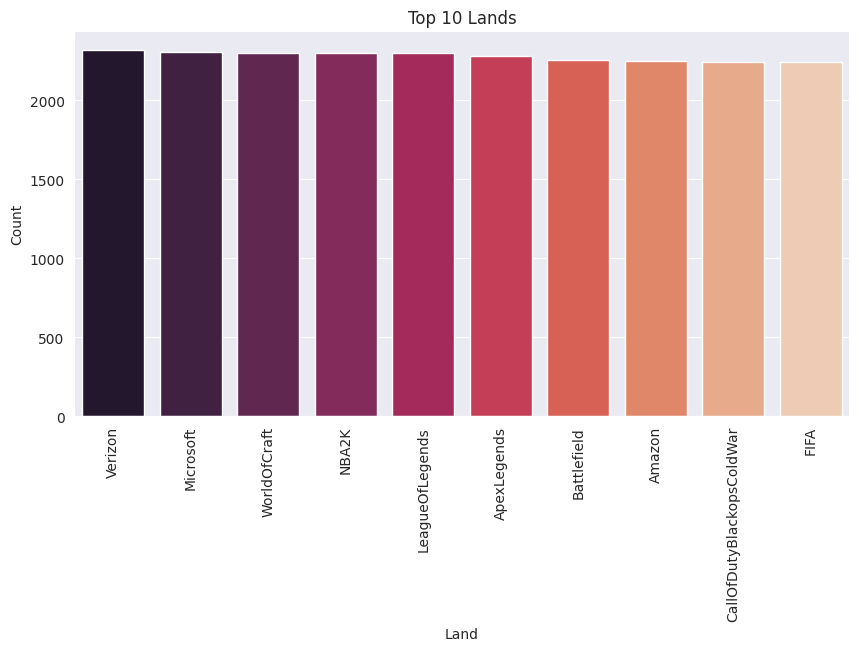

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
bar=sns.barplot(land_counts[:10],x='Land',y='Count',palette='rocket')
plt.title('Top 10 Lands')
plt.xlabel('Land')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Mode column:
   1- number of unique values :4.

   2- the name of mode category.

   3- value counts of mode category.

In [16]:
print(f'number of unique values of Mode is :{df.Mode.nunique()}')
print('**' * 20)
print(df.Mode.unique())
print('**'*20)
mode_counts = df['Mode'].value_counts().reset_index()
mode_counts.columns = ['Mode', 'Count']
mode_counts = mode_counts.sort_values(by='Count', ascending=False).reset_index(drop=True)
mode_counts

number of unique values of Mode is :4
****************************************
['Positive' 'Neutral' 'Negative' 'Irrelevant']
****************************************


,Mode,Count
0,Positive,15234
1,Negative,14308
2,Neutral,12428
3,Irrelevant,9588


# we find:
1-The mode 'Negative' has a percentage of 29.68% in the data.

2-The mode 'Positive' has a percentage of 28.75% in the data.

3-The mode 'Neutral' has a percentage of 23.08% in the data.

4-The mode 'Irrelevant' has a percentage of 18.50% in the data.


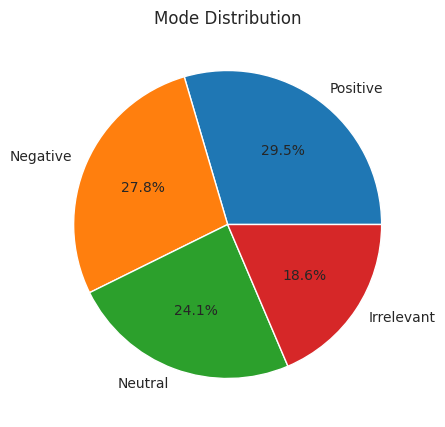

In [17]:
plt.figure(figsize=(10,5))
plt.pie(mode_counts['Count'],labels=mode_counts['Mode'],autopct='%1.1f%%')
textprops={"fontsize":10,"fontweight":"black"},
colors=sns.color_palette("rocket")
plt.title('Mode Distribution')
plt.show()


In [18]:
for Mode,Count in zip(mode_counts.Mode,mode_counts.Count):
  percent=(Count/len(df))*100
  print(f"The mode '{Mode}' has a percentage of {percent:.2f}% in the data.")
  print('**'*20)


The mode 'Positive' has a percentage of 29.55% in the data.
****************************************
The mode 'Negative' has a percentage of 27.75% in the data.
****************************************
The mode 'Neutral' has a percentage of 24.10% in the data.
****************************************
The mode 'Irrelevant' has a percentage of 18.60% in the data.
****************************************


# The negative mode appears most frequently.

/tmp/ipython-input-19-10518880.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar=sns.barplot(mode_counts,x='Mode',y='Count',palette='rocket')


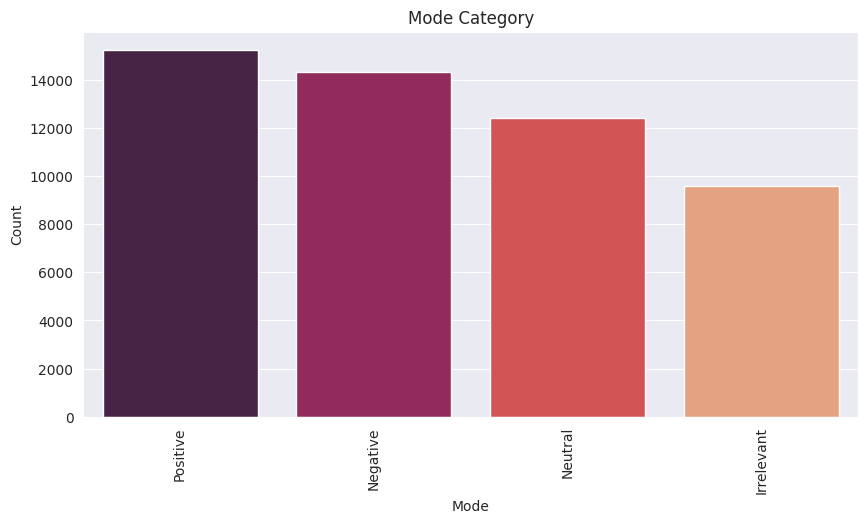

In [19]:
plt.figure(figsize=(10,5))
bar=sns.barplot(mode_counts,x='Mode',y='Count',palette='rocket')
plt.title('Mode Category')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


# we find :
 1-the most Land has positive mode: **Borderlands**.

 2-the most Land has Negative mode: **NBA2K**.

 3-the most Land has Natural mode:
**Amazon**.

 4-the most Land has Irrelevant mode:
**Xbox**.

In [20]:
pd.crosstab(df.Mode,df.Land).T.style.background_gradient(subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'],cmap='Greens')\
.background_gradient(subset=['Neutral'],cmap='Blues')\
.background_gradient(subset=['Irrelevant'],cmap='Purples')

Mode,Irrelevant,Negative,Neutral,Positive
Land,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,971
CS-GO,620,335,523,717
CallOfDuty,65,67,63,83
CallOfDutyBlackopsColdWar,545,540,340,817
Dota2,401,705,579,540


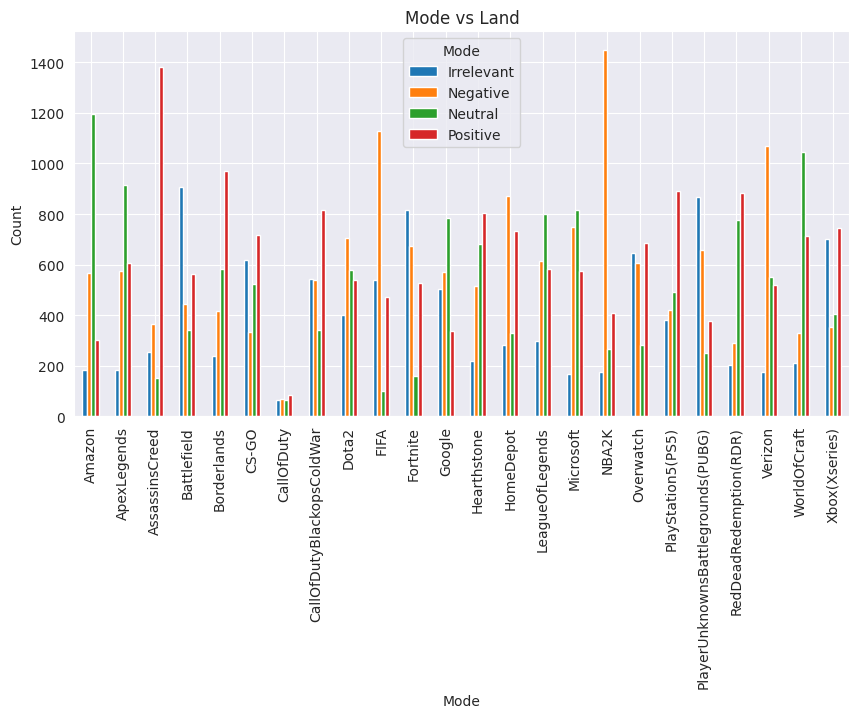

In [21]:
pd.crosstab(df.Land,df.Mode).plot(kind='bar',figsize=(10,5))
plt.title('Mode vs Land')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()

we can deal with various emojis which are used from people to show off their emotion about the post(replace or delete them)
* Needless to say , emojis can play important role in determining the class in the views

In [22]:
def clean_emoji(tx):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols
                           u"\U0001F680-\U0001F6FF"  # transport
                           u"\U0001F1E0-\U0001F1FF"  # flags
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

    return emoji_pattern.sub(r'', tx)

text_clear function we have replaced more than 1 punctuations(those we have allowed to be) to just 1
* Finally , all texts become lower mode and instead more than 1 space be just 1 space

In [23]:
def text_cleaner(tx):

    text = re.sub(r"won\'t", "would not", tx)
    text = re.sub(r"im", "i am", tx)
    text = re.sub(r"Im", "I am", tx)
    text = re.sub(r"can\'t", "can not", text)
    text = re.sub(r"don\'t", "do not", text)
    text = re.sub(r"shouldn\'t", "should not", text)
    text = re.sub(r"needn\'t", "need not", text)
    text = re.sub(r"hasn\'t", "has not", text)
    text = re.sub(r"haven\'t", "have not", text)
    text = re.sub(r"weren\'t", "were not", text)
    text = re.sub(r"mightn\'t", "might not", text)
    text = re.sub(r"didn\'t", "did not", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub(r'[^a-zA-Z0-9\!\?\.\@]',' ' , text)
    text = re.sub(r'[!]+' , '!' , text)
    text = re.sub(r'[?]+' , '?' , text)
    text = re.sub(r'[.]+' , '.' , text)
    text = re.sub(r'[@]+' , '@' , text)
    text = re.sub(r'unk' , ' ' , text)
    text = re.sub('\n', '', text)
    text = text.lower()
    text = re.sub(r'[ ]+' , ' ' , text)

    return text

* Before applying text cleaning to the entire dataset, a few common NLP methods will be tested on a random sample selected using random.choice, and then cleaned using the defined function to observe the result.

In [24]:
random.seed(100)
test_text=text_cleaner(random.choice(df['Text']))
test_text=clean_emoji(test_text)
print(test_text)

 next gen performance. most small xbox ever. damn they have to keep repeating. xbox series s is 1440p60 low end performance do not tell me it is more powerful than ps5 digital


In [25]:
df['Text']

,Text
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
53821,@ CfDuty fix their game new omg challenge with...
53822,@CallofDuty fix your game new omg challenge re...
53823,Dear @CallofDuty fix your stupid game new omg ...
53824,@CallofDuty fix your game new omg challenge cu...


# part of speech(pos):
* Using the spaCy library and its English language model (en_core_web_sm), we can perform Part of Speech (POS) tagging to identify how each word functions grammatically in a sentence.

* This is important for understanding the correct meaning and usage of words.
In this section, we will demonstrate POS tagging on a specific sample.

In [26]:
nlp = spacy.load("en_core_web_sm")
doc=nlp(test_text)
for token in doc:
  print(f'{token.text}==>{token.pos_}')
  print('**'*5)

 ==>SPACE
**********
next==>ADJ
**********
gen==>NOUN
**********
performance==>NOUN
**********
.==>PUNCT
**********
most==>ADJ
**********
small==>PROPN
**********
xbox==>PROPN
**********
ever==>ADV
**********
.==>PUNCT
**********
damn==>INTJ
**********
they==>PRON
**********
have==>VERB
**********
to==>PART
**********
keep==>VERB
**********
repeating==>VERB
**********
.==>PUNCT
**********
xbox==>PROPN
**********
series==>PROPN
**********
s==>PROPN
**********
is==>AUX
**********
1440p60==>ADJ
**********
low==>ADJ
**********
end==>NOUN
**********
performance==>NOUN
**********
do==>AUX
**********
not==>PART
**********
tell==>VERB
**********
me==>PRON
**********
it==>PRON
**********
is==>AUX
**********
more==>ADV
**********
powerful==>ADJ
**********
than==>ADP
**********
ps5==>PROPN
**********
digital==>NOUN
**********


# Named Entity Recognition:
* Named Entity Recognition (NER) is a powerful NLP technique that automatically identifies and classifies key information in text, such as names of people, organizations, locations, and dates.
* Using the spaCy library, we will demonstrate NER on a sample text to showcase how it efficiently extracts important entities from unstructured data.












In [27]:
doc=nlp(test_text)
for token in doc.ents:
  print(f'{token.text}==>{token.label_}')
  print('**'*5)

xbox==>ORG
**********
1440p60==>CARDINAL
**********


# Chunk:
* Chunking is the process of grouping related words into meaningful phrases—such as noun or verb chunks—for easier understanding of sentence structure.
* It helps in simplifying text by breaking it into smaller parts based on grammatical roles.
For example:

- NP = Noun Phrase (Noun Chunk)

- VP = Verb Phrase (Verb Chunk)

In [28]:
doc=nlp(test_text)
for chunk in doc.noun_chunks:
  print(f'{chunk.text}==>{chunk.label_}')
  print('**'*5)

 next gen performance==>NP
**********
most small xbox==>NP
**********
they==>NP
**********
xbox series s==>NP
**********
low end performance==>NP
**********
me==>NP
**********
it==>NP
**********
ps5 digital==>NP
**********


# Tokenization:
 * the most important process that breaking text into smaller parts for easier to machine analysis,helping machines understand human langusge..smaller parts known as tokens.

 * there are various types of tokenizations, which each one has different method for breaking a text into tokens such as:
      * RegexpTokenizaton.
      * TweetTokenization.



Here we are using Regexp tokenization which splits a string into substrings using a regular expression. base on space.

In [29]:
df['Text']

,Text
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
53821,@ CfDuty fix their game new omg challenge with...
53822,@CallofDuty fix your game new omg challenge re...
53823,Dear @CallofDuty fix your stupid game new omg ...
53824,@CallofDuty fix your game new omg challenge cu...


In [30]:
Tokenizer=RegexpTokenizer(r'\w+')
test_text_tokenized=Tokenizer.tokenize(test_text)
test_text_tokenized

['next',
 'gen',
 'performance',
 'most',
 'small',
 'xbox',
 'ever',
 'damn',
 'they',
 'have',
 'to',
 'keep',
 'repeating',
 'xbox',
 'series',
 's',
 'is',
 '1440p60',
 'low',
 'end',
 'performance',
 'do',
 'not',
 'tell',
 'me',
 'it',
 'is',
 'more',
 'powerful',
 'than',
 'ps5',
 'digital']

In [31]:
df['Text']

,Text
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
53821,@ CfDuty fix their game new omg challenge with...
53822,@CallofDuty fix your game new omg challenge re...
53823,Dear @CallofDuty fix your stupid game new omg ...
53824,@CallofDuty fix your game new omg challenge cu...


# countVectorizer:
used to convert documents.....
 * text into vectors of term or token counts,it involves counting the number of occurances of words.


['1440p60' 'damn' 'digital' 'do' 'end' 'ever' 'gen' 'have' 'is' 'it'
 'keep' 'low' 'me' 'more' 'most' 'next' 'not' 'performance' 'powerful'
 'ps5' 'repeating' 'series' 'small' 'tell' 'than' 'they' 'to' 'xbox']
****************************************
[[1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2]]
****************************************


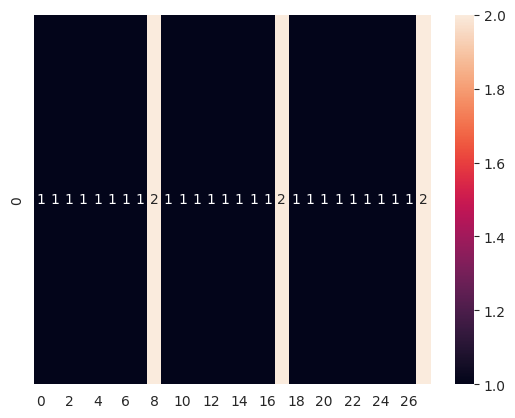

In [32]:
counter_vectorizer=CountVectorizer()
transform=counter_vectorizer.fit_transform([test_text]).toarray()
print(counter_vectorizer.get_feature_names_out())
print('**' *20)
print(transform)
print('**' *20)
sns.heatmap(transform,annot=True,cmap='rocket')
plt.show()

### TF-IDF Summary (Term Frequency – Inverse Document Frequency)

**TF-IDF** is a statistical measure used to evaluate how important a word is to a document in a collection (corpus). It combines two components:

---

🔹 **1. Term Frequency (TF):**  
Represents how often a term appears in a single document, normalized by the total number of terms in that document.

\[
TF(t) = \frac{\text{Number of times term } t \text{ appears in the document}}{\text{Total number of terms in the document}}
\]

---

🔹 **2. Inverse Document Frequency (IDF):**  
Measures how rare or common a term is across all documents in the corpus.  
The more documents the term appears in, the less informative it is.

\[
IDF(t) = \log \left( \frac{\text{Total number of documents}}{\text{Number of documents containing the term } t} \right)
\]

---

🔹 **TF-IDF Score:**

\[
TF\text{-}IDF(t) = TF(t) \times IDF(t)
\]

---

### 📌 Interpretation:

- A **high TF-IDF** score → word is important in that document **but rare across the corpus**.
- A **low TF-IDF** score → word is either common in many documents (like "the", "and") or not relevant.

---

> ✅ TF-IDF helps identify the **most meaningful keywords** in a document compared to the whole dataset.




['1440p60' 'damn' 'digital' 'do' 'end' 'ever' 'gen' 'have' 'is' 'it'
 'keep' 'low' 'me' 'more' 'most' 'next' 'not' 'performance' 'powerful'
 'ps5' 'repeating' 'series' 'small' 'tell' 'than' 'they' 'to' 'xbox']
****************************************
[[0.16439899 0.16439899 0.16439899 0.16439899 0.16439899 0.16439899
  0.16439899 0.16439899 0.32879797 0.16439899 0.16439899 0.16439899
  0.16439899 0.16439899 0.16439899 0.16439899 0.16439899 0.32879797
  0.16439899 0.16439899 0.16439899 0.16439899 0.16439899 0.16439899
  0.16439899 0.16439899 0.16439899 0.32879797]]


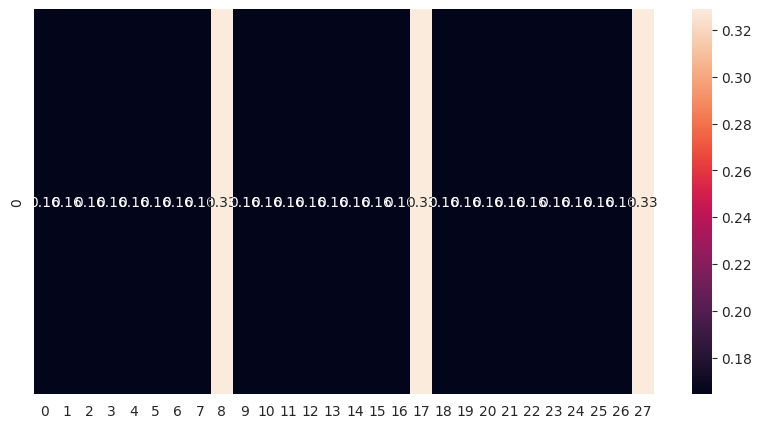

In [33]:
TF_IDF=TfidfVectorizer()
transform=TF_IDF.fit_transform([test_text]).toarray()
print(TF_IDF.get_feature_names_out())
print('**' *20)
print(transform)
plt.figure(figsize=(10,5))
sns.heatmap(transform,annot=True,cmap='rocket')
plt.show()

In [34]:
print(test_text_tokenized)

['next', 'gen', 'performance', 'most', 'small', 'xbox', 'ever', 'damn', 'they', 'have', 'to', 'keep', 'repeating', 'xbox', 'series', 's', 'is', '1440p60', 'low', 'end', 'performance', 'do', 'not', 'tell', 'me', 'it', 'is', 'more', 'powerful', 'than', 'ps5', 'digital']


### 🔹 N-grams

**N-grams** are continuous sequences of *N* items (usually words) from a given text. They are used in Natural Language Processing (NLP) to understand context, co-occurrence, and word patterns.

- An **N-gram** can be made of words, characters, numbers, or even punctuation.
- A **2-gram (bigram)** includes each word and the one that follows it.
- A **3-gram (trigram)** includes a word and the next two words, and so on.

---




In [35]:
def n_grams(text,n):
  n_grams=[]
  for i in range(len(text)-(n*3+1)):
    n_gram=text[i:i+n]
    n_grams.append(n_gram)
  return n_grams

n_grams(test_text_tokenized,3)

[['next', 'gen', 'performance'],
 ['gen', 'performance', 'most'],
 ['performance', 'most', 'small'],
 ['most', 'small', 'xbox'],
 ['small', 'xbox', 'ever'],
 ['xbox', 'ever', 'damn'],
 ['ever', 'damn', 'they'],
 ['damn', 'they', 'have'],
 ['they', 'have', 'to'],
 ['have', 'to', 'keep'],
 ['to', 'keep', 'repeating'],
 ['keep', 'repeating', 'xbox'],
 ['repeating', 'xbox', 'series'],
 ['xbox', 'series', 's'],
 ['series', 's', 'is'],
 ['s', 'is', '1440p60'],
 ['is', '1440p60', 'low'],
 ['1440p60', 'low', 'end'],
 ['low', 'end', 'performance'],
 ['end', 'performance', 'do'],
 ['performance', 'do', 'not'],
 ['do', 'not', 'tell']]

In [36]:
nltk.download('stopwords')
stopwords_list=stopwords.words('english')
print(f'there are {len(stopwords_list)} stop words in english')

print('**' *30)
for idx,value in enumerate(stopwords_list[:20]):
  print(f'{idx+1}==>{value}')

there are 198 stop words in english
************************************************************
1==>a
2==>about
3==>above
4==>after
5==>again
6==>against
7==>ain
8==>all
9==>am
10==>an
11==>and
12==>any
13==>are
14==>aren
15==>aren't
16==>as
17==>at
18==>be
19==>because
20==>been


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
df['Text']

,Text
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
53821,@ CfDuty fix their game new omg challenge with...
53822,@CallofDuty fix your game new omg challenge re...
53823,Dear @CallofDuty fix your stupid game new omg ...
53824,@CallofDuty fix your game new omg challenge cu...


In [38]:
new_list=[]

for word in test_text_tokenized:
   if word not in stopwords_list:
       new_list.append(word)
       print(f'"{word}" ===>is not a stop word')
print('**' *20)
print(new_list)



"next" ===>is not a stop word
"gen" ===>is not a stop word
"performance" ===>is not a stop word
"small" ===>is not a stop word
"xbox" ===>is not a stop word
"ever" ===>is not a stop word
"damn" ===>is not a stop word
"keep" ===>is not a stop word
"repeating" ===>is not a stop word
"xbox" ===>is not a stop word
"series" ===>is not a stop word
"1440p60" ===>is not a stop word
"low" ===>is not a stop word
"end" ===>is not a stop word
"performance" ===>is not a stop word
"tell" ===>is not a stop word
"powerful" ===>is not a stop word
"ps5" ===>is not a stop word
"digital" ===>is not a stop word
****************************************
['next', 'gen', 'performance', 'small', 'xbox', 'ever', 'damn', 'keep', 'repeating', 'xbox', 'series', '1440p60', 'low', 'end', 'performance', 'tell', 'powerful', 'ps5', 'digital']


In [39]:
def make_corpus(value):
  corpus=[]
  for text in df.loc[df['Mode']==value]['Text'].str.split():
    for word in text:
      corpus.append(word)
  return corpus




Top stopwords in 'Positive' class:
the => 7818
to => 5725
and => 5095
a => 4171
of => 3926
for => 3184
is => 3146
in => 2715
my => 2280
this => 2180


/tmp/ipython-input-40-3718480346.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dic_df, x='Stopword', y='Count', palette='rocket')


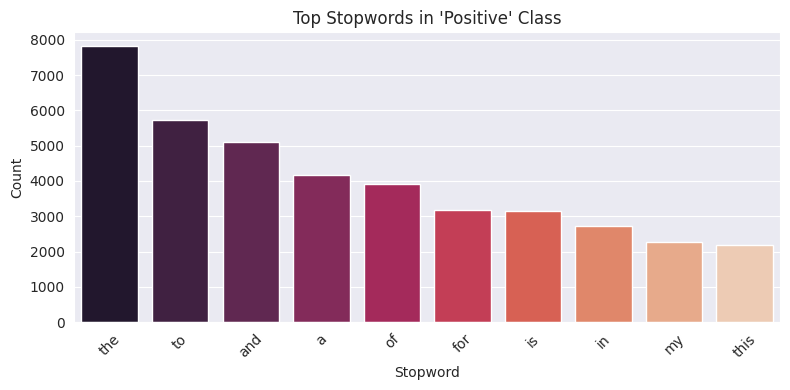


Top stopwords in 'Neutral' class:
the => 6279
to => 4582
and => 4127
a => 3814
of => 3388
for => 2672
in => 2373
is => 2105
on => 1950
this => 1512


/tmp/ipython-input-40-3718480346.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dic_df, x='Stopword', y='Count', palette='rocket')


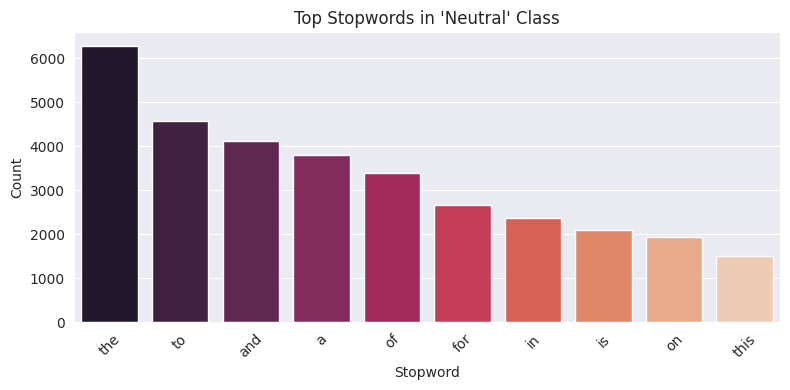


Top stopwords in 'Negative' class:
the => 7707
to => 5672
and => 4976
a => 4387
is => 4018
of => 3532
in => 2782
for => 2593
my => 2428
you => 2286


/tmp/ipython-input-40-3718480346.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dic_df, x='Stopword', y='Count', palette='rocket')


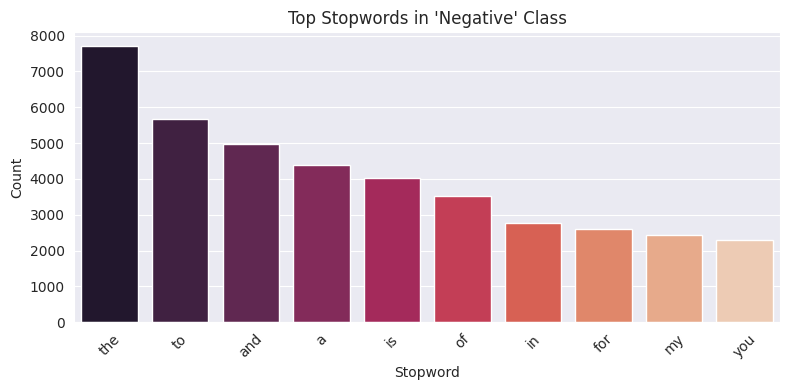


Top stopwords in 'Irrelevant' class:
the => 5097
to => 3528
and => 3142
a => 2914
of => 2446
is => 2144
for => 2098
in => 1948
you => 1557
on => 1392


/tmp/ipython-input-40-3718480346.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dic_df, x='Stopword', y='Count', palette='rocket')


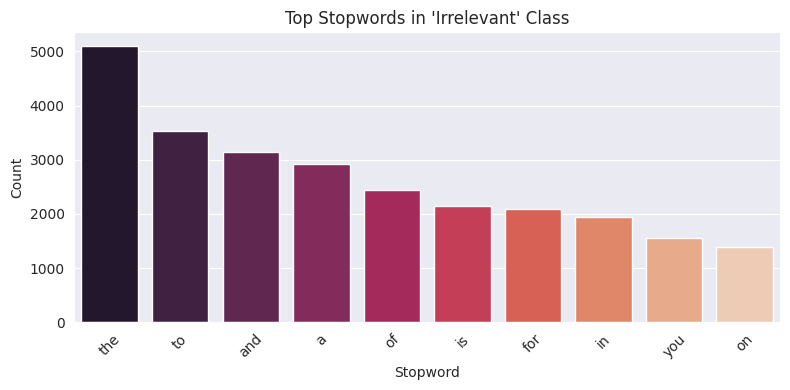

In [40]:
from collections import defaultdict
from nltk.corpus import stopwords

stop = stopwords.words('english')
sentiment = list(df.Mode.unique())

for value in sentiment:
    corpus = make_corpus(value)

    dic = defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word] += 1


    top_dic = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:10]


    print(f"\nTop stopwords in '{value}' class:")
    for word, count in top_dic:
        print(f"{word} => {count}")

    dic_df = pd.DataFrame(top_dic, columns=['Stopword', 'Count'])
    plt.figure(figsize=(8, 4))
    sns.barplot(data=dic_df, x='Stopword', y='Count', palette='rocket')
    plt.title(f"Top Stopwords in '{value}' Class")
    plt.xlabel('Stopword')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 🔍 Lemmatization vs Stemming

**Lemmatization**  
Lemmatization is a text pre-processing technique used in Natural Language Processing (NLP) to reduce words to their base or dictionary form (lemma).  
It helps identify the true meaning of words by mapping them to their linguistic root.  
For example, the word `better` is lemmatized to `good`.

**Stemming**  
Stemming is also an NLP technique that reduces words to their root form, called a **stem**.  
However, it does so by chopping off suffixes — and may result in non-meaningful or incomplete words.  
For example, `playing`, `played`, and `plays` might all become `play`.

---

### 🔄 Difference Between Lemmatization and Stemming

| Feature           | Lemmatization                 | Stemming                          |
|-------------------|-------------------------------|-----------------------------------|
| Output            | Real word (linguistically valid) | May not be a real word             |
| Accuracy          | More accurate                 | Less accurate                     |
| Speed             | Slower                        | Faster                            |
| Use Case          | Smaller datasets / when accuracy matters | Large datasets / when speed matters |

---

In [41]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(test_text)
for token in doc:
  print(f'{token.text}==>{token.lemma_}')

 ==> 
next==>next
gen==>gen
performance==>performance
.==>.
most==>most
small==>small
xbox==>xbox
ever==>ever
.==>.
damn==>damn
they==>they
have==>have
to==>to
keep==>keep
repeating==>repeat
.==>.
xbox==>xbox
series==>series
s==>s
is==>be
1440p60==>1440p60
low==>low
end==>end
performance==>performance
do==>do
not==>not
tell==>tell
me==>I
it==>it
is==>be
more==>more
powerful==>powerful
than==>than
ps5==>ps5
digital==>digital


In [42]:

stopwords_list = stopwords.words('english')
stemmer = PorterStemmer()

def stopwords_cleaner(text):
    words = text.split()
    word = [stemmer.stem(word) for word in words if word.lower() not in stopwords_list]
    peasting = ' '.join(word)
    return peasting


df['Text'] = df['Text'].apply(stopwords_cleaner)


df['Text'][:10].to_frame()


,Text
0,"come border kill all,"
1,"im get borderland kill all,"
2,"im come borderland murder all,"
3,"im get borderland 2 murder all,"
4,"im get borderland murder all,"
5,spent hour make someth fun. . . know huge @bor...
6,spent coupl hour someth fun... know huge @ bor...
7,spent hour someth fun... know huge @ borderlan...
8,spent hour make someth fun. . . know huge rhan...
9,2010 spent hour make someth fun. . . know huge...


### 🌥️ WordCloud Visualization

**WordCloud** is a data visualization technique used to represent text data, where the size of each word indicates its **frequency** or **importance** within the dataset.

In this project, we generate a word cloud for each unique `Mode` in the dataset.  
Stopwords (common and less meaningful words like "is", "the", "and") are excluded to focus on the most important and representative words.

This helps us to:
- Identify frequently mentioned words in each category.
- Understand the key themes or topics associated with each mode.

📌 Below, we visualize the **top words (excluding stopwords)** for each Mode using `WordCloud`.


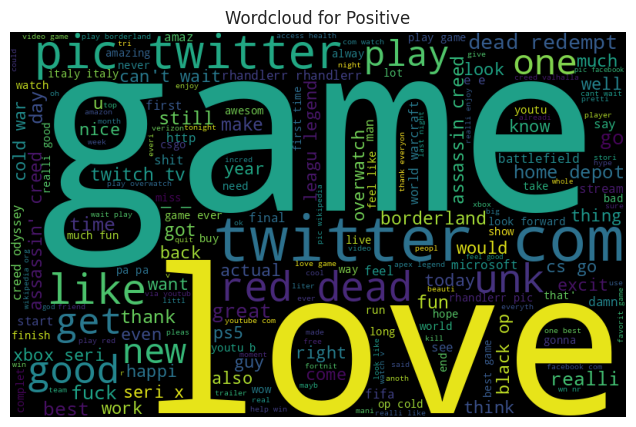

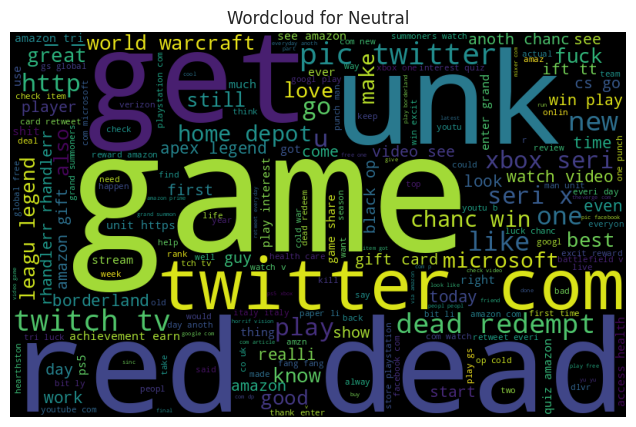

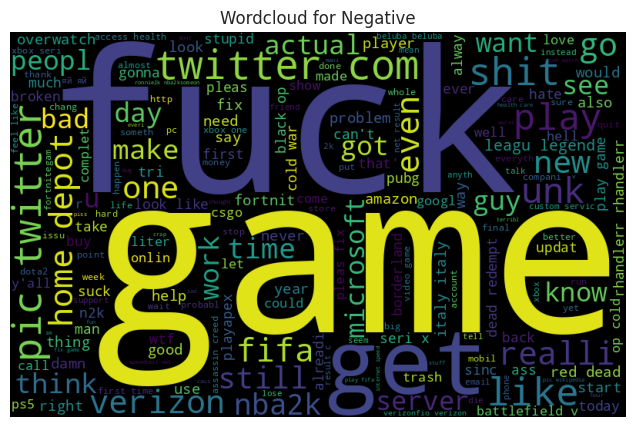

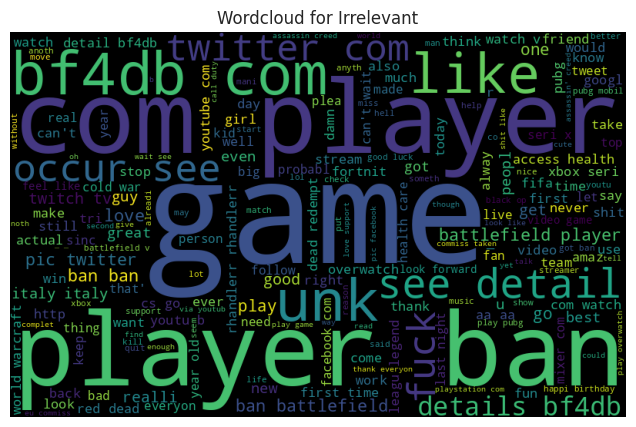

In [43]:
sentiment=list(df['Mode'].unique())
for value in sentiment:
  mode_review_text=df[df['Mode']==value]['Text']
  mode_word=' '.join(map(str,mode_review_text))
  wordcloud=WordCloud(width=800,height=500,background_color='black',stopwords=stopwords_list).generate(mode_word)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.axis('off')
  plt.title(f'Wordcloud for {value}')
  plt.show()


### 📊 Description

Below are several fundamental statistics used to understand the nature of the corpus, including:

- **Maximum length** of texts: 871 characters  
- **Minimum length**: 0 characters  
- **Mean (average) length**: 76.91  
- **Standard deviation (std)**: 55.64  
- And the most **important metric**: the maximum number of characters we will allow per sample.

⚠️ For example, some reviews contain up to **871 characters**, which is computationally expensive and may harm the model’s learning performance.

To solve this:
- We use a statistical rule: **μ + 2σ (mean + 2 × std)**, which typically covers about **95% of the data**.
- This allows us to retain most of the data while **reducing input size** and improving training efficiency.

Rather than using all characters from each text, we will **truncate** samples that exceed this threshold and **pad** those that are shorter — using a special token like `PAD` — to ensure **uniform input length** for all samples.

📌 In our case:  
> **μ + 2σ = 188.19**, so we will set the maximum number of characters per sample to **188**.



In [44]:
len_text=[len(text) for text in df['Text']]

print(f'maximum length {max(len_text)}')
print('**' *10)
print(f'minimum length {min(len_text)}')
print('**' *10)
print(f'average length {sum(len_text)/len(len_text)}')
print('**' *10)
print(f'standard deviation {np.std(len_text):.2f}')
print('**' *10)
print(f'Mean Length : {round(np.mean(len_text),2)}')
print('**' *10)
print(f'Mew + 2sigma : {round(np.mean(len_text)+ 2 *np.std(len_text),2)}')

maximum length 692
********************
minimum length 0
********************
average length 76.13476085185616
********************
standard deviation 55.14
********************
Mean Length : 76.13
********************
Mew + 2sigma : 186.42


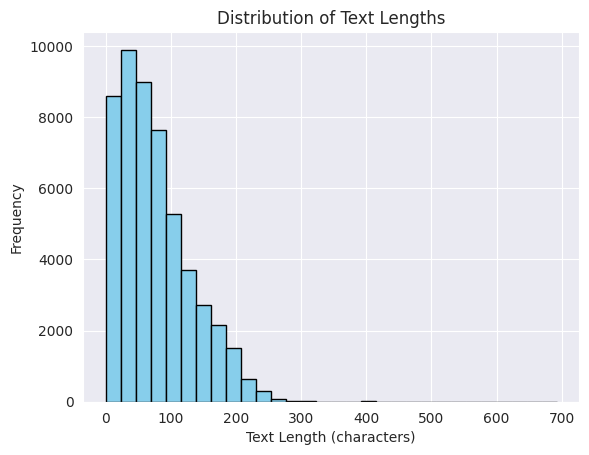

In [45]:
plt.hist(len_text, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.show()


### 🧹 Clean

* Now, after removing all stopwords, we want to see what words are most common for each **Mode** in our corpus.  

* Instead of using a word cloud, we visualize the top words using a **bar chart**, which gives clearer insights into the frequency of each word.

* This approach is useful to analyze the most prominent terms in each sentiment category.

  


Top words for Mode: Positive


,Word,Count
0,game,1881
1,play,1845
2,love,1439
3,like,1086
4,thank,1027
5,good,1022
6,get,1020
7,realli,948
8,new,873
9,look,831


********************************************************************************************************************************************************************************************************


/tmp/ipython-input-46-3649599417.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word, x='Word', y='Count', palette='rocket')



Top words for Mode: Neutral


,Word,Count
0,play,1212
1,game,948
2,amazon,864
3,get,863
4,new,653
5,like,625
6,one,618
7,dead,617
8,googl,614
9,red,599


********************************************************************************************************************************************************************************************************


/tmp/ipython-input-46-3649599417.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word, x='Word', y='Count', palette='rocket')



Top words for Mode: Negative


,Word,Count
0,game,2190
1,fuck,1597
2,get,1343
3,play,1250
4,like,1078
5,shit,769
6,fifa,736
7,fix,729
8,go,728
9,make,709


********************************************************************************************************************************************************************************************************


/tmp/ipython-input-46-3649599417.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word, x='Word', y='Count', palette='rocket')



Top words for Mode: Irrelevant


,Word,Count
0,player,1015
1,see,905
2,ban,882
3,like,763
4,game,736
5,play,613
6,battlefield,526
7,get,523
8,love,518
9,fuck,501


********************************************************************************************************************************************************************************************************


/tmp/ipython-input-46-3649599417.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_word, x='Word', y='Count', palette='rocket')


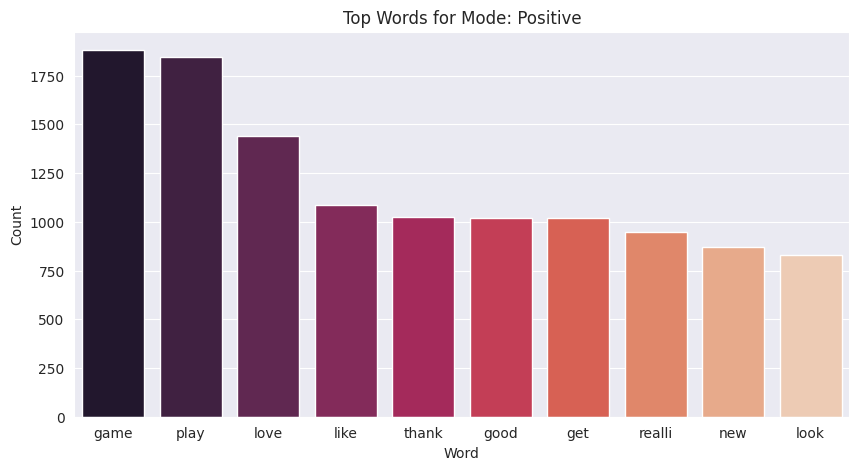

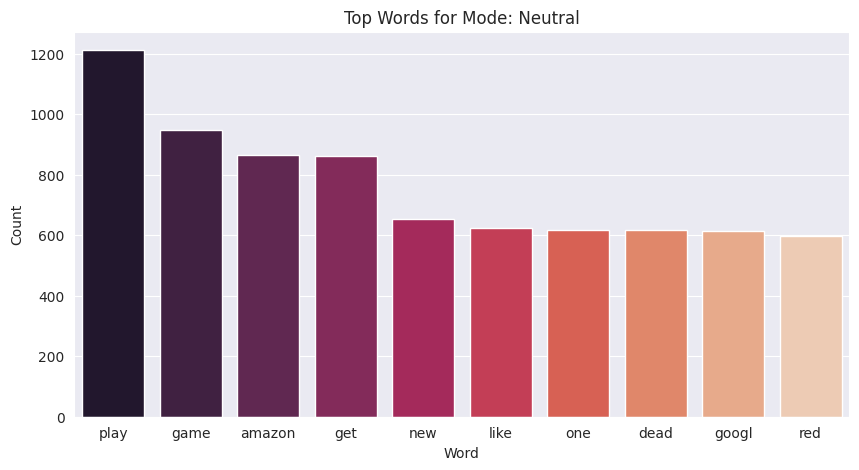

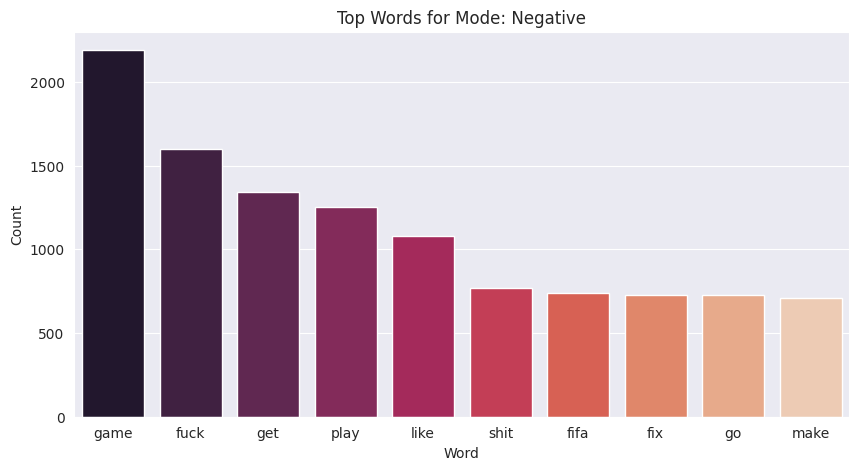

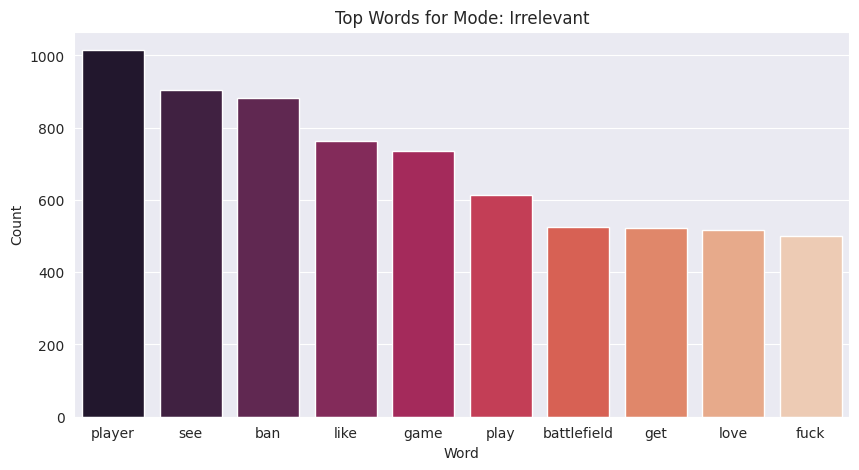

In [46]:
from collections import Counter
counter=Counter()
sentiment=list(df['Mode'].unique())

for idx,value in enumerate(sentiment):
  text_mode=df[df['Mode']==value]['Text']
  counter=Counter()
  for word_list in text_mode:
    cleaned_text=text_cleaner(clean_emoji(word_list))
    words=word_list.split()
    for word in words:
      if word not in stopwords_list and word.isalpha():
        counter.update([word])


  df_word = pd.DataFrame(counter.most_common(10), columns=['Word', 'Count'])
  print(f"\nTop words for Mode: {value}")
  display(df_word.style.background_gradient(cmap='rocket'))
  print('**' *100)
  plt.figure(figsize=(10,5))
  sns.barplot(data=df_word, x='Word', y='Count', palette='rocket')
  plt.title(f"Top Words for Mode: {value}")
  plt.xlabel('Word')
  plt.ylabel('Count')



In [47]:
df['Mode'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [48]:
df['Sentiment']=df['Mode'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':2})

/tmp/ipython-input-48-3308582248.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Sentiment']=df['Mode'].replace({'Positive':1,'Negative':0,'Neutral':2,'Irrelevant':2})


In [49]:
df.sample(7)

,Index,Land,Mode,Text,Sentiment
36186,8211,Microsoft,Negative,microsoft stupid... offic program (arguabl nec...,0
29475,668,ApexLegends,Positive,could genuin love heart.,1
8444,9449,Overwatch,Irrelevant,might also last team make difficult decision.,2
40615,1370,Battlefield,Irrelevant,ban battlefield 4 player poseidonmaia occur se...,2
14315,2854,Dota2,Negative,"guys, whatev dont play dota2 matchmak night u ...",0
6512,320,Amazon,Neutral,enabl enter awesom,2
15640,3076,Dota2,Negative,9 total smelli dota 2 - casey,0


### 🧾 Dataset Class Explanation

In this section, we define a custom PyTorch `Dataset` class to organize our text and sentiment label data for training.

This class helps us:

- 📦 Store the input features (`text`) and target labels (`sentiment`)
- 🔁 Automatically convert each sample into PyTorch tensors
- 🚀 Integrate smoothly with PyTorch’s `DataLoader` for batching and shuffling
- 🧠 Simplify the training process with clean and modular code

By implementing the methods `__len__` and `__getitem__`, we make the dataset compatible with PyTorch's training pipeline.  
This allows us to iterate over the dataset efficiently and feed it into our model in mini-batches during training.


In [50]:

class CustomDataset(Dataset):
    def __init__(self, text, sentiment):
        self.text = text
        self.sentiment = sentiment

    def __len__(self):
        return len(self.text)

    def __getitem__(self, idx):
        return {
            'Text': torch.tensor(self.text[idx], dtype=torch.long),
            'Sentiment': torch.tensor(self.sentiment[idx], dtype=torch.long)
        }

### 🧠 What is the Embedding Matrix?

In this section, we build the **embedding matrix** that will be used to initialize the embedding layer in our model.

---

### 📌 Purpose of the Embedding Matrix

The embedding matrix maps each word in our dataset to its corresponding **pre-trained word vector** (like from GloVe).

This gives our model rich, meaningful word representations without training them from scratch.

---

### ⚙️ How it works

1. **`word_index`**  
   - A dictionary from the tokenizer.  
   - Maps each word in our text data to a unique integer ID.  
   - Example:  
     ```python
     {'i': 1, 'love': 2, 'pizza': 3}
     ```

2. **`embedding_dict`**  
   - A dictionary loaded from a pre-trained embeddings file (e.g., GloVe).
   - Maps each word to a vector of floats (usually 100D, 200D, or 300D).
   - Example:  
     ```python
     {'love': [0.123, -0.456, ..., 0.782]}
     ```

3. **Initialize the embedding matrix**
   - Create a zero matrix with shape:  
     ```
     (number of unique words + 1, embedding dimension)
     ```
   - We use `+1` because index 0 is usually reserved for padding.

4. **Fill the matrix**
   - For each word in `word_index`, if the word exists in `embedding_dict`,  
     copy its vector to the correct row in the matrix using its index.

---

### 📐 Example shape

If:
- Your tokenizer found 10,000 unique words
- You're using 300-dimensional GloVe vectors

Then:




---

### ✅ Why it’s useful

- 🔁 Saves training time (reuses learned word meanings)
- 🧠 Improves model performance with better word representations
- 📊 Compatible with most deep learning libraries (like Keras and PyTorch)

---





In [51]:
def load_vectors(fname):
  file_name=open(fname,encoding='utf8')
  data={}
  for line in file_name:
    tokens=line.split()
    data[tokens[0]]=np.array(tokens[1:],dtype=np.float32)
  return data


In [52]:
def create_embedding_matrix(word_index,embedding_dic):
  embedding_matrix=np.zeros((len(word_index)+1,300))
  for word,i in word_index.items():
    if word in embedding_dic:
      embedding_matrix[i]=embedding_dic[word]
  return embedding_matrix

# 📘 Understanding BiLSTM (Bidirectional LSTM)

---

## 🧠 What is LSTM?

**LSTM** stands for **Long Short-Term Memory**. It is a special type of Recurrent Neural Network (RNN) that is capable of learning long-term dependencies in sequential data such as text, time series, or speech.

Unlike traditional RNNs, LSTMs are designed to **retain important information over long sequences** and avoid the problem of forgetting earlier parts of the sequence.

It does this through three main gates:
- **Forget Gate**: Decides what information to discard from memory.
- **Input Gate**: Determines what new information to store.
- **Output Gate**: Controls what information to output at each time step.

---

## 🔄 What is a BiLSTM?

**BiLSTM** stands for **Bidirectional LSTM**.

While a normal LSTM reads the sequence from **left to right** (past to future), a **BiLSTM processes the sequence in both directions**:
1. **Forward direction** (left to right)
2. **Backward direction** (right to left)

This allows the model to have information from both the **past** and the **future** at every point in the sequence.

---

## 📌 Why Use BiLSTM?

In many language tasks, the meaning of a word depends not only on the words **before** it but also on the words **after** it.

For example:
- In **sentiment analysis**, the last word may carry the main sentiment.
- In **named entity recognition**, a word might be identified as a name or location depending on the surrounding context.
- In **machine translation**, understanding the full sentence improves translation accuracy.

BiLSTM helps in these cases by capturing context from both directions.

---

## 🔬 How BiLSTM Works (Conceptually)

At each position in the sequence:
- A **forward LSTM** reads the sequence from the beginning to the end.
- A **backward LSTM** reads the sequence from the end to the beginning.
- The outputs from both directions are **concatenated** to form the final representation for that position.

So, the model has **complete context**: both what came before and what comes after the current word or token.

---

## 📊 Summary of BiLSTM vs LSTM

| Feature                  | LSTM (Unidirectional)    | BiLSTM (Bidirectional)             |
|--------------------------|---------------------------|-------------------------------------|
| Direction                | Left to right             | Both left-to-right and right-to-left |
| Context captured         | Past only                 | Past and future                     |
| Sequence understanding   | Partial                   | Full                                |

---

## 🧠 Key Benefits of BiLSTM

- Enhanced understanding of word context.
- Better performance in many NLP tasks.
- Access to full sentence information at each step.


# LSTM  : (Long Short-Term Memory)

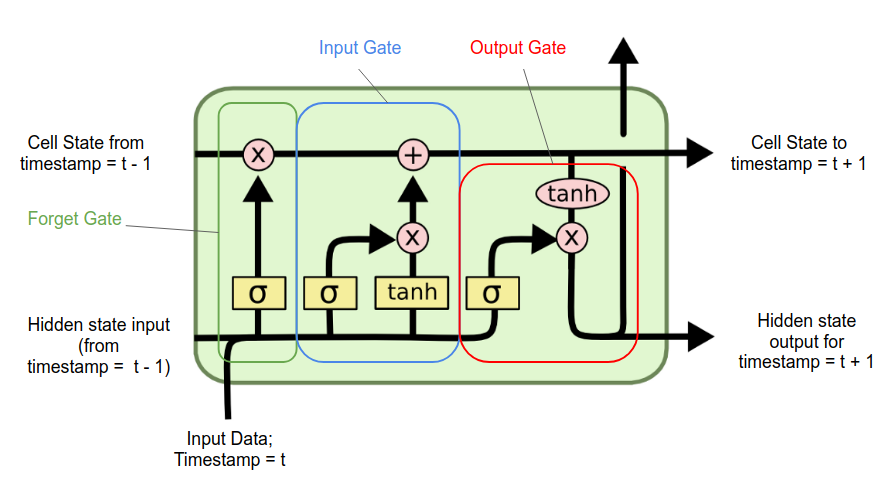

# 📘  Bidirectional Neural Network :



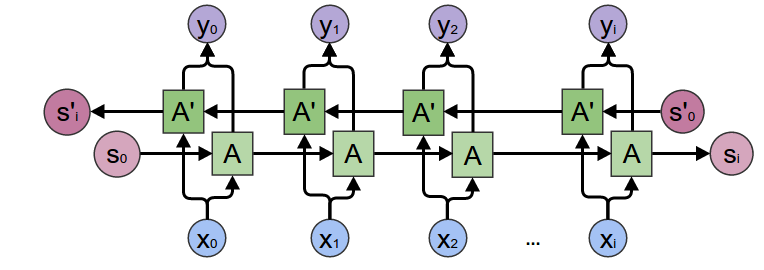

In [53]:
class sentimentBiLSTM(nn.Module):
  def __init__(self,embedding_matrix,hidden_dim,output_size):
    super(sentimentBiLSTM,self).__init__()
    num_words=embedding_matrix.shape[0]
    embed_dim=embedding_matrix.shape[1]
    self.embedding=nn.Embedding(num_embeddings=num_words,embedding_dim=embed_dim)
    self.embedding.weight=nn.Parameter(torch.tensor(embedding_matrix,dtype=torch.float32))
    self.embedding.weight.requires_grad=False
    self.lstm=nn.LSTM(embed_dim,hidden_dim,bidirectional=True,batch_first=True)
    self.fc=nn.Linear(hidden_dim*2,output_size)

  def forward(self,x):

    embeds=self.embedding(x)
    lstm_out,_=self.lstm(embeds)
    out=self.fc(lstm_out[:,-1])

    return out





### 🔀 Splitting the Dataset into Training and Testing Sets

In this step, we split our dataset into two parts:

- **Training Set (80%)**: Used to train the machine learning model.
- **Testing Set (20%)**: Used to evaluate the performance of the model on unseen data.

We use the `train_test_split` function from `sklearn.model_selection`, and we apply `stratify=y` to make sure the class distribution in the target variable (`Sentiment`) is preserved in both the training and testing sets.

This helps the model generalize better and ensures fair evaluation during testing.


In [54]:
y=df.Sentiment.values
train_df,test_df=train_test_split(df,test_size=0.2,stratify=y)

### ⚙️ Configuration: Model Hyperparameters and Device Setup

In this step, we define key hyperparameters for training the model:

- `MAX_LEN`: The maximum sequence length for input sentences (used for padding/truncation).
- `BATCH_SIZE`: The number of samples per training batch.
- `hidden_dim`: The size of the hidden layer in the LSTM.
- `output_size`: The number of output classes (e.g., Positive, Neutral, Negative).

We also check if a GPU is available. If it is, we use it for faster training (`cuda`), otherwise we fall back to the CPU. The selected device is printed to confirm.

This setup ensures that the model runs efficiently based on the hardware availability.


### 📌 Explanation of Key Hyperparameters

#### 1️⃣ MAX_LEN = 167
This means:  
- Any sentence longer than 167 tokens will be truncated.  
- Any sentence shorter than 167 tokens will be padded with zeros.

**Goal:** To make all sentences the same length so we can feed them into the model in batches.

**Example:** If a sentence has 120 words → it will be padded with 47 zeros.

---

#### 2️⃣ BATCH_SIZE = 32
This means that during training, the model processes 32 sentences at a time.

**Why?**
- It's more efficient and faster than training one sentence at a time.
- A larger batch size can speed up training,
  but if it's too large, it may cause overfitting or memory issues.

---

#### 3️⃣ hidden_dim = 64
This is the number of hidden units in the LSTM layer.

- It controls the model's ability to learn complex patterns.
- In a BiLSTM, the output dimension is `hidden_dim * 2` (i.e., 128 in this case).
- A large hidden_dim might lead to better learning, but also risks overfitting.

---

#### 4️⃣ output_size = 3
This means the model will produce 3 output values (because we have 3 sentiment classes).

- Each value represents a score (or probability) for a class.
- After applying softmax, the output will be:
  - Probability of class 0
  - Probability of class 1
  - Probability of class 2


In [55]:
MAX_LEN = 167
BATCH_SIZE = 32
hidden_dim = 64
output_size = 3


if torch.cuda.is_available():
  device=torch.device("cuda")

else:
  device=torch.device('cpu')


print(f'current device is {device}')

current device is cpu


In [59]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df.Text.values.tolist())

xtrain=tokenizer.texts_to_sequences(train_df.Text.values)
xtest=tokenizer.texts_to_sequences(test_df.Text.values)



xtrain=pad_sequences(xtrain,maxlen=MAX_LEN)
xtest=pad_sequences(xtest,maxlen=MAX_LEN)

train_Dataset=CustomDataset(text=xtrain,sentiment=train_df.Sentiment.values)
train_loader=DataLoader(train_Dataset,batch_size=BATCH_SIZE,shuffle=True)
valid_Dataset=CustomDataset(text=xtest,sentiment=test_df.Sentiment.values)
valid_loader=DataLoader(valid_Dataset,batch_size=BATCH_SIZE,shuffle=True)




## 🔄 Understanding `one_batch = next(iter(train_loader))`

This line of code retrieves **one batch of data** from the `train_loader`, which is an instance of PyTorch's `DataLoader`.

- `iter(train_loader)`: Creates an iterator over the training data.
- `next(...)`: Fetches the next batch from the iterator (i.e., the first batch in this case).

The returned `one_batch` is a **dictionary** (because `CustomDataset.__getitem__()` returns a dict) that looks like:

```python
{
  'text': Tensor of shape (BATCH_SIZE, MAX_LEN),
  'sentiment': Tensor of shape (BATCH_SIZE)
}


In [ ]:
one_batch=next(iter(train_loader))
one_batch

## 🔄 Loading GloVe Embeddings into Google Colab

In this section, we load the **GloVe word embeddings** from a text file (`glove.6B.300d.txt`) into a Python dictionary. The GloVe embeddings contain word vectors, where each word is mapped to a vector of real numbers that represent semantic meaning.

### 🧠 The Process

1. **File Path**: The file is stored at `/content/glove.6B.300d.txt` in Google Colab after downloading it from Kaggle.
2. **Function**: We define a function `load_vectors()` that reads the GloVe file, splits each line by spaces, and stores the word and its corresponding vector into a dictionary.


In [60]:
embedding_dic=load_vectors('/content/glove.6B.300d.txt')


## 🧱 Creating the Embedding Matrix from Tokenizer and GloVe

This line creates an **embedding matrix** using the vocabulary generated by the tokenizer and the pre-trained GloVe word embeddings.




In [61]:
embedding_matrix=create_embedding_matrix(tokenizer.word_index,embedding_dic)

## 🧠 Initializing the BiLSTM Sentiment Classification Model

In this step, we initialize our custom neural network model for sentiment classification using a **Bidirectional LSTM (BiLSTM)** architecture.


In [62]:
model=sentimentBiLSTM(embedding_matrix,hidden_dim,output_size)
model=model.to(device)
print(model)

sentimentBiLSTM(
  (embedding): Embedding(25512, 300)
  (lstm): LSTM(300, 64, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=128, out_features=3, bias=True)
)


In [63]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

optimizer=optim.Adam(model.parameters(),lr=0.001)

criterion=nn.CrossEntropyLoss()

def acc(pred,label):
  pred=torch.argmax(pred,dim=1)
  return (pred==label).sum()/len(pred)

## 🔁 Training & Evaluation Loop Explanation (PyTorch)

This notebook cell explains the full process of training and evaluating a deep learning model (e.g., LSTM) using PyTorch.

---

### 1. Initialization
- `epochs`: Number of full training passes over the dataset.
- `clip`: Maximum norm for gradient clipping to avoid exploding gradients.
- Lists to store training and validation loss/accuracy over epochs.

---

### 2. Training Phase (`model.train()`)
For each epoch:
- Switch model to training mode with `model.train()`.
- Loop through `train_loader` batches:
  - Move inputs (`Text`) and labels (`Sentiment`) to the selected device (CPU/GPU).
  - Clear previous gradients using `optimizer.zero_grad()`.
  - Compute predictions using `model(inputs)`.
  - Calculate loss using the loss function (`criterion`).
  - Perform backpropagation: `loss.backward()`.
  - Clip gradients with `nn.utils.clip_grad_norm_()` to prevent exploding gradients.
  - Update model weights using `optimizer.step()`.
  - Accumulate training loss and accuracy.

---

### 3. Evaluation Phase (`model.eval()`)
- Switch model to evaluation mode with `model.eval()` to deactivate Dropout/BatchNorm.
- Use `with torch.no_grad()` to disable gradient tracking during validation.
- Loop through `valid_loader` batches:
  - Move inputs and labels to the device.
  - Compute outputs and loss.
  - Accumulate validation loss and accuracy.
  - No weight updates or backpropagation is done in this phase.

---

### 4. Logging and Metrics
- Compute average training and validation loss per epoch.
- Compute average accuracy per epoch.
- Print all metrics for monitoring progress.

---

### ✅ Key Concepts Used
- `optimizer.zero_grad()`: Clears old gradients.
- `loss.backward()`: Calculates new gradients.
- `optimizer.step()`: Updates weights.
- `clip_grad_norm_()`: Prevents unstable gradients in RNN/LSTM.
- `model.eval()` and `torch.no_grad()`: Proper evaluation mode.



In [64]:
train_df.columns

Index(['Index', 'Land', 'Mode', 'Text', 'Sentiment'], dtype='object')

In [65]:
epochs = 9
clip = 5

epoch_train_loss, epoch_valid_loss = [], []
epoch_train_acc, epoch_valid_acc = [], []

for epoch in range(epochs):
    train_losses = []
    train_acc = 0.0

    model.train()  # Set model to training mode
    correct = 0

    for data in train_loader:
        inputs = data['Text']
        labels = data['Sentiment']

        inputs = inputs.to(device, dtype=torch.long)
        labels = labels.to(device, dtype=torch.float)

        optimizer.zero_grad()  # ✅ Clear gradients before each batch
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()

        # ✅ Gradient clipping to prevent exploding gradients in RNNs/LSTMs
        nn.utils.clip_grad_norm_(model.parameters(), clip)

        optimizer.step()  # ✅ Update model parameters

        train_losses.append(loss.item())
        accuracy = acc(outputs, labels)
        train_acc += accuracy

    # 🔽 Validation Phase 🔽
    model.eval()  # ✅ Set model to evaluation mode (important for layers like dropout, batchnorm)
    valid_losses = []
    valid_acc = 0.0

    with torch.no_grad():  # ✅ Turn off gradient computation for validation
        for data in valid_loader:
            inputs = data['Text']
            labels = data['Sentiment']

            inputs = inputs.to(device, dtype=torch.long)
            labels = labels.to(device, dtype=torch.float)

            outputs = model(inputs)
            loss = criterion(outputs, labels.long())
            valid_losses.append(loss.item())

            accuracy = acc(outputs, labels)
            valid_acc += accuracy

    # ✅ Calculate average losses and accuracy
    avg_train_loss = np.mean(train_losses)
    avg_valid_loss = np.mean(valid_losses)
    avg_train_acc = train_acc / len(train_loader)
    avg_valid_acc = valid_acc / len(valid_loader)

    epoch_train_loss.append(avg_train_loss)
    epoch_valid_loss.append(avg_valid_loss)
    epoch_train_acc.append(avg_train_acc)
    epoch_valid_acc.append(avg_valid_acc)

    # ✅ Print metrics for each epoch
    print(f"Epoch {epoch+1}/{epochs}")
    print(f"Train Loss: {avg_train_loss:.4f}, Train Acc: {avg_train_acc:.4f}")
    print(f"Valid Loss: {avg_valid_loss:.4f}, Valid Acc: {avg_valid_acc:.4f}")
    print("-" * 50)


Epoch 1/9
Train Loss: 0.9233, Train Acc: 0.5456
Valid Loss: 0.8754, Valid Acc: 0.5722
--------------------------------------------------
Epoch 2/9
Train Loss: 0.7938, Train Acc: 0.6307
Valid Loss: 0.7773, Valid Acc: 0.6427
--------------------------------------------------
Epoch 3/9
Train Loss: 0.6771, Train Acc: 0.6996
Valid Loss: 0.7063, Valid Acc: 0.6808
--------------------------------------------------
Epoch 4/9
Train Loss: 0.5693, Train Acc: 0.7512
Valid Loss: 0.6576, Valid Acc: 0.7110
--------------------------------------------------
Epoch 5/9
Train Loss: 0.4791, Train Acc: 0.7978
Valid Loss: 0.6080, Valid Acc: 0.7386
--------------------------------------------------
Epoch 6/9
Train Loss: 0.4090, Train Acc: 0.8268
Valid Loss: 0.5845, Valid Acc: 0.7549
--------------------------------------------------
Epoch 7/9
Train Loss: 0.3540, Train Acc: 0.8505
Valid Loss: 0.5813, Valid Acc: 0.7629
--------------------------------------------------
Epoch 8/9
Train Loss: 0.3117, Train Acc: 

### 📊 Training and Validation Metrics Visualization

To understand how the model performs over time, we visualize both training and validation **accuracy** and **loss** across epochs.

#### 🔹 Accuracy Plot
- **Train Accuracy**: Measures how well the model is fitting the training data.
- **Validation Accuracy**: Measures how well the model generalizes to unseen data.
- A good model will show increasing accuracy for both training and validation.

#### 🔹 Loss Plot
- **Train Loss**: The model’s error on the training data.
- **Validation Loss**: The model’s error on unseen validation data.
- Ideally, both losses should decrease as training progresses.

#### 🧠 Diagnosis
- If **train accuracy is high** but **validation accuracy is low**, the model may be **overfitting**.
- If **both accuracies are low**, the model may be **underfitting**.
- If **train and validation accuracy improve together**, the model is likely generalizing well.


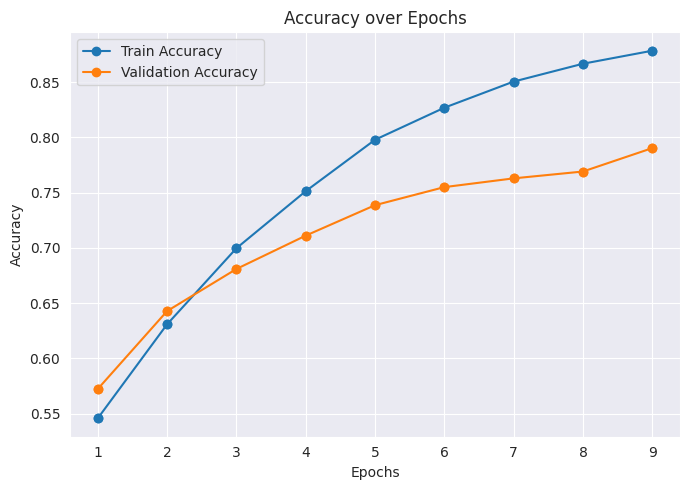

In [69]:

# Accuracy Plot
plt.figure(figsize=(7, 5))
plt.plot(range(1, epochs + 1), epoch_train_acc, label='Train Accuracy', marker='o')
plt.plot(range(1, epochs + 1), epoch_valid_acc, label='Validation Accuracy', marker='o')
plt.scatter(range(1, epochs + 1), epoch_train_acc)
plt.scatter(range(1, epochs + 1), epoch_valid_acc)
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('accuracy_plot.png')
plt.show()




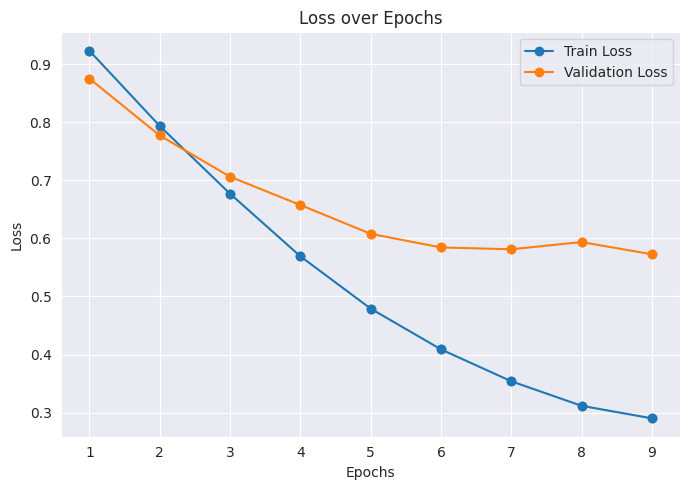

In [70]:
# Loss Plot
plt.figure(figsize=(7, 5))
plt.plot(range(1, epochs + 1), epoch_train_loss, label='Train Loss', marker='o')
plt.plot(range(1, epochs + 1), epoch_valid_loss, label='Validation Loss', marker='o')
plt.scatter(range(1, epochs + 1), epoch_train_loss)
plt.scatter(range(1, epochs + 1), epoch_valid_loss)
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('loss_plot.png')
plt.show()